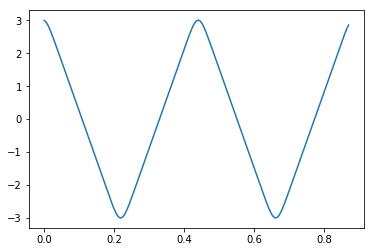

In [50]:
# Troy Pettie
# 5001910623
# Let's first try linear force  Fx=-.01x^11
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
#   23 periods generated in 10 units means 2 period in 10/23 units
b = 20/23
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 3.;   y[1] = -5.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                            
    fReturn[1] = -.01*y[0]**11                          # finish this line 
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

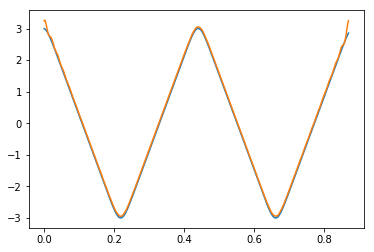

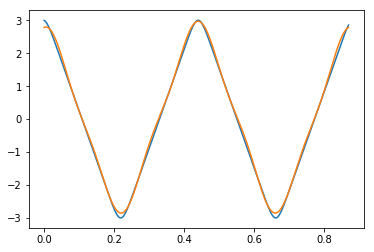

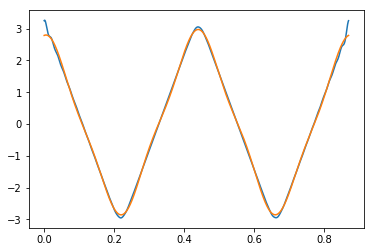

In [51]:
#Method to find the coefficients of the fourier series,
#found at https://stackoverflow.com/questions/4258106/how-to-calculate-a-fourier-series-in-numpy
def cn(n):
    c = yp*np.exp(-1j*2*n*np.pi*xp/b)
    return c.sum()/c.size

def f(x, Nh):
    f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/b) for i in range(1,Nh+1)])
    return f.sum()

y2 = np.array([f(x,50).real for x in xp])

p.plot(xp, yp)
p.plot(xp, y2)
p.show()

#y2 is constructed by f(x,n), then by inspecting the size of its members we can show we can generate the signal with 
#significant smaller n than 50
nPlot = 0

for q in range (1,10):
    y2 = np.array([f(x,q).real for x in xp])
    error = np.array(abs((y2[3]-yp[3])/yp[3]))
    if(error < .1):
        nPlot = q
        break

#nPlot is the number of harmonics you need to generate all constituents of the original signal
#Now we try to create the signal using only 6 harmonics and compare it to the above
y2 = np.array([f(x,nPlot).real for x in xp])
p.plot(xp, yp)
p.plot(xp, y2)
p.show()

#Now we compare the signal created using 6 harmonics with one using 50
y1 = np.array([f(x,50).real for x in xp])
p.plot(xp, y1)
p.plot(xp, y2)
p.show()

#As we can see by the second and third graphs we were able to create very similar signals
#creating less harmonics